<a href="https://colab.research.google.com/github/sxm18940/Assignment3/blob/main/ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import warnings
warnings.filterwarnings("ignore") # To ignore the warnings that are generated

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [3]:
#Question-1 (TITANIC DATASET)
from google.colab import drive
drive.mount('/content/gdrive')
train_dataframe=pd.read_csv("gdrive/My Drive/train/train.csv")
train_dataframe.head()

Mounted at /content/gdrive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#1 Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.
#      a. Why should we keep this feature?

train_dataframe[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [5]:
a = preprocessing.LabelEncoder()
train_dataframe['Sex'] = a.fit_transform(train_dataframe.Sex.values)
train_dataframe['Survived'].corr(train_dataframe['Sex'])

-0.5433513806577555

In [47]:
matrix = train_dataframe.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

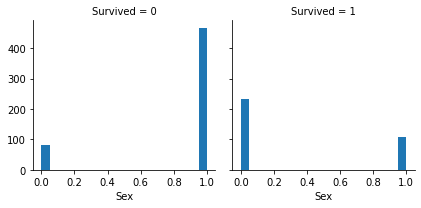

In [7]:
#2. Atleast two visualizations to describe or show correlations
g = sns.FacetGrid(train_dataframe, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

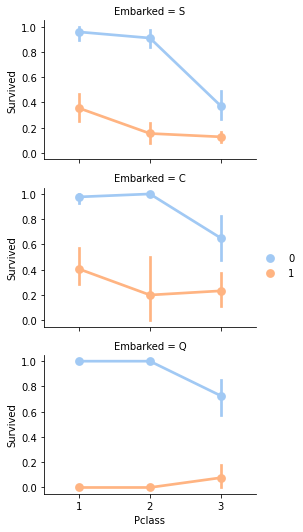

In [57]:
grid = sns.FacetGrid(train_dataframe, row='Embarked', size=2.5, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='pastel')
grid.add_legend()

In [54]:
train_dataframe.corr().style.background_gradient(cmap="Blues")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


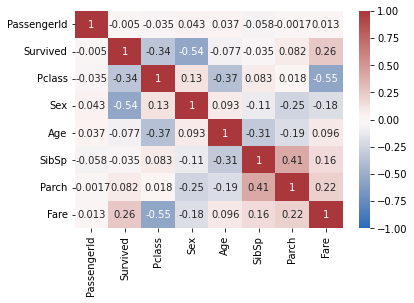

In [55]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [27]:
#3.. Implementing Naïve Bayes method using scikit-learn library and report the accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [32]:

train_df1=pd.read_csv("gdrive/My Drive/train/train.csv")
test_df = pd.read_csv("gdrive/My Drive/test/test.csv")
train_df1['train'] = 1
test_df['train'] = 0
df = train_df1.append(test_df, sort=False)
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'
df = df[features + [target] + ['train']]
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

In [33]:
# Droping missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values
train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=0)

In [36]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_predt = classifier.predict(X_test)
print(classification_report(y_test, y_predt))
print(confusion_matrix(y_test, y_predt))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy:',accuracy_score(y_predt,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        82
         1.0       0.75      0.66      0.70        61

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

[[69 13]
 [21 40]]
accuracy: 0.7622377622377622


In [37]:
#Question-2 (GLASS DATASET)
#1.. Implementing Naïve Bayes method using scikit-learn library.
# a. Use the glass dataset available
 
glass_df = pd.read_csv("gdrive/My Drive/glass/glass.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
glass_df.corr().style.background_gradient(cmap="Blues")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [39]:
x=glass_df.iloc[:,:-1].values
y=glass_df['Type'].values

In [50]:
#1b. Use train_test_split to create training and testing part. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25, random_state = 0)

In [51]:
# Evaluating the model on testing part using score and
# 1. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_predt = classifier.predict(x_test)
print(classification_report(y_test, y_predt))
print(confusion_matrix(y_test, y_predt))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy:',accuracy_score(y_predt,y_test))

              precision    recall  f1-score   support

           1       0.32      0.64      0.43        14
           2       0.45      0.21      0.29        24
           3       0.50      0.40      0.44         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.46        54
   macro avg       0.49      0.54      0.49        54
weighted avg       0.49      0.46      0.44        54

[[ 9  3  1  0  1  0]
 [17  5  1  1  0  0]
 [ 2  1  2  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
accuracy: 0.46296296296296297


In [52]:
#Question-3
#1. Implement linear SVM method using scikit library
#      a. Use the glass dataset available
# Support Vector Machine's 
from sklearn.svm import SVC, LinearSVC
classifier = LinearSVC()
classifier.fit(x_train, y_train)
y_predt = classifier.predict(x_test)
print(classification_report(y_test, y_predt))
print(confusion_matrix(y_test, y_predt))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_predt,y_test))

              precision    recall  f1-score   support

           1       0.44      0.86      0.59        14
           2       0.73      0.33      0.46        24
           3       0.00      0.00      0.00         5
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         2
           7       0.58      1.00      0.74         7

    accuracy                           0.52        54
   macro avg       0.35      0.45      0.36        54
weighted avg       0.53      0.52      0.47        54

[[12  1  0  1  0  0]
 [12  8  0  1  1  2]
 [ 3  2  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  7]]
accuracy is 0.5185185185185185


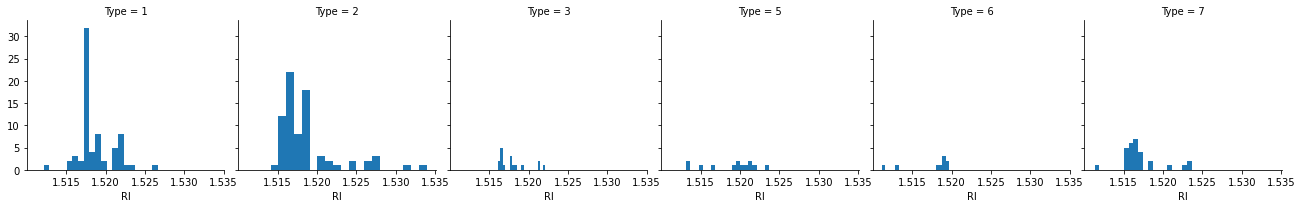

In [53]:
#Do at least two visualizations to describe or show correlations in the Glass Dataset
g = sns.FacetGrid(glass_df, col='Type')
g.map(plt.hist,'RI',bins=20)

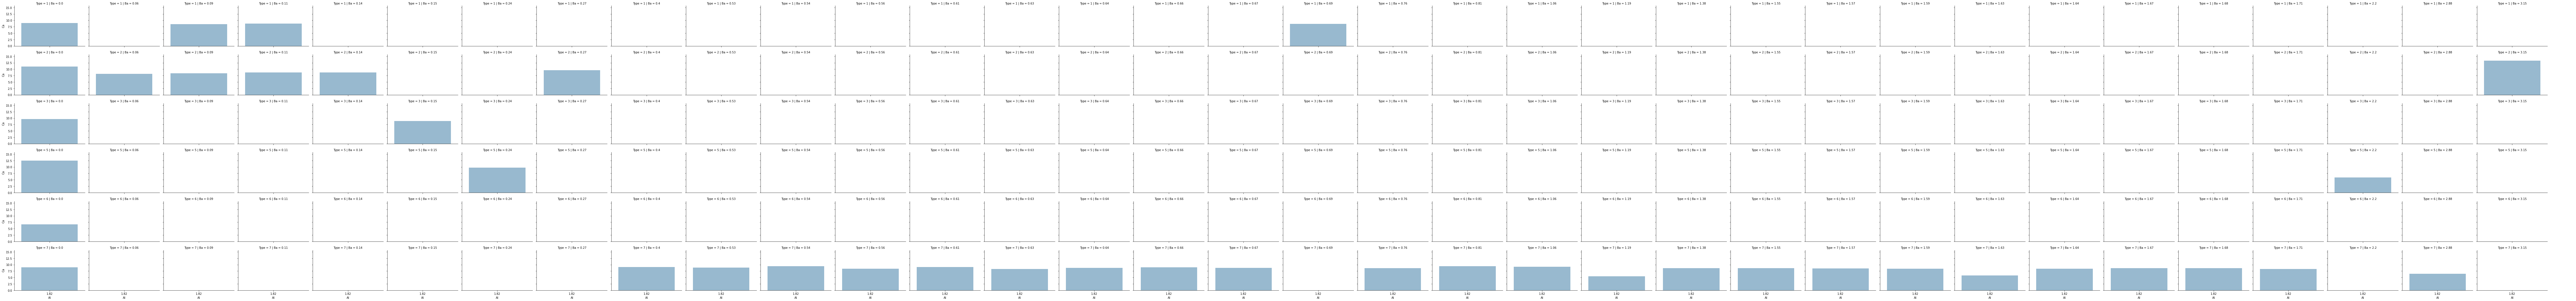

In [61]:
grid = sns.FacetGrid(glass_df, row='Type',col='Ba',height=2.5,aspect=1.5)
grid.map(sns.barplot,'Al','Ca',alpha=.5,ci=None)
grid.add_legend()

In [ ]:
#Which algorithm you got better accuracy? Can you justify why?
#Got the better accuracty in the Gaussian Naive Bayes algorithm. when features are not distinct this cxan be used.